In [ ]:
# Check GPU status
!nvidia-smi

Wed Nov 13 12:14:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [ ]:
dataset_path = "/content/drive/MyDrive/DL final model/camouflage-5"

In [ ]:
import os
import glob

# Define the path to your dataset on Google Drive
dataset_path = "/content/drive/MyDrive/DL final model/camouflage-5"

# List all files in the dataset path
all_files = glob.glob(os.path.join(dataset_path, '**'), recursive=True)

# Print each file path
for file in all_files:
    print(file)


/content/drive/MyDrive/DL final model/camouflage-5/
/content/drive/MyDrive/DL final model/camouflage-5/README.dataset.txt
/content/drive/MyDrive/DL final model/camouflage-5/data.yaml
/content/drive/MyDrive/DL final model/camouflage-5/README.roboflow.txt
/content/drive/MyDrive/DL final model/camouflage-5/test
/content/drive/MyDrive/DL final model/camouflage-5/test/labels
/content/drive/MyDrive/DL final model/camouflage-5/test/labels/4_jpg.rf.f48796eca693f8b4871b3adc26338fec.txt
/content/drive/MyDrive/DL final model/camouflage-5/test/labels/3_jpg.rf.28810e7e06812b3c2330d652ce85a58b.txt
/content/drive/MyDrive/DL final model/camouflage-5/test/labels/image1_jpg.rf.d45ae921e9bd63ccdab89d2e2335ea4b.txt
/content/drive/MyDrive/DL final model/camouflage-5/test/labels/38_jpg.rf.7a31ab5c5b9c4b178047bd7ea82f278f.txt
/content/drive/MyDrive/DL final model/camouflage-5/test/labels/17_jpg.rf.c1f6db21c30e03f99111fc4dd59b3635.txt
/content/drive/MyDrive/DL final model/camouflage-5/test/labels/108_jpg.rf.f

In [ ]:
import yaml

# Define the path to the data.yaml file
yaml_path = "/content/drive/MyDrive/DL final model/camouflage-5/data.yaml"

# Open and load the YAML file
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Display the contents
print(data)


{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 2, 'names': ['Human', 'animal-human-detection'], 'roboflow': {'workspace': 'majeed-0edkj', 'project': 'camouflage-xy3zl', 'version': 5, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/majeed-0edkj/camouflage-xy3zl/dataset/5'}}


In [ ]:
# Ensure you're in the HOME directory
%cd {HOME}

# Run YOLO training with the correct path format
!yolo task=detect mode=train model=yolo11s.pt data="{dataset_path}/data.yaml" epochs=15 imgsz=640 plots=True


/content
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/drive/MyDrive/DL final model/camouflage-5/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [ ]:
from IPython.display import display, Markdown

# Updated metrics (as you've provided)
class_names = ["All", "Human", "Animal-Human"]
images = [23, 22]
instances = [25, 24]
box_p = [0.794, 0.588]
recall = [0.271, 0.542]
map50 = [0.271, 0.538]
map50_95 = [0.135, 0.269]

# Create markdown content for the summary report
metrics_report = f"""
## YOLO Model Metrics Summary

**Model:** YOLO11s
**Parameters:** 9,413,574
**GFLOPs:** 21.3

### Class-Wise Performance
| Class                    | Images | Instances | Box(P) | Recall | mAP50  | mAP50-95 |
|--------------------------|--------|-----------|--------|--------|--------|----------|
| All                      | {images[0]}      | {instances[0]}         | {box_p[0]:.3f}   | {recall[0]:.3f}   | {map50[0]:.3f} | {map50_95[0]:.3f}   |
| Human                    | {images[1]}      | {instances[1]}         | {box_p[1]:.3f}   | {recall[1]:.3f}   | {map50[1]:.3f} | {map50_95[1]:.3f}   |

### Speed
- **Preprocess:** 0.2 ms per image
- **Inference:** 4.7 ms per image
- **Loss calculation:** 0.0 ms per image
- **Post-process:** 1.8 ms per image

### Results Location
Results saved to: `runs/detect/train`
"""

# Display the summary as markdown
display(Markdown(metrics_report))



## YOLO Model Metrics Summary

**Model:** YOLO11s
**Parameters:** 9,413,574
**GFLOPs:** 21.3

### Class-Wise Performance
| Class                    | Images | Instances | Box(P) | Recall | mAP50  | mAP50-95 |
|--------------------------|--------|-----------|--------|--------|--------|----------|
| All                      | 23      | 25         | 0.794   | 0.271   | 0.271 | 0.135   |
| Human                    | 22      | 24         | 0.588   | 0.542   | 0.538 | 0.269   |

### Speed
- **Preprocess:** 0.2 ms per image
- **Inference:** 4.7 ms per image
- **Loss calculation:** 0.0 ms per image
- **Post-process:** 1.8 ms per image

### Results Location
Results saved to: `runs/detect/train`


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1731479632.d646ecb99651.1714.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


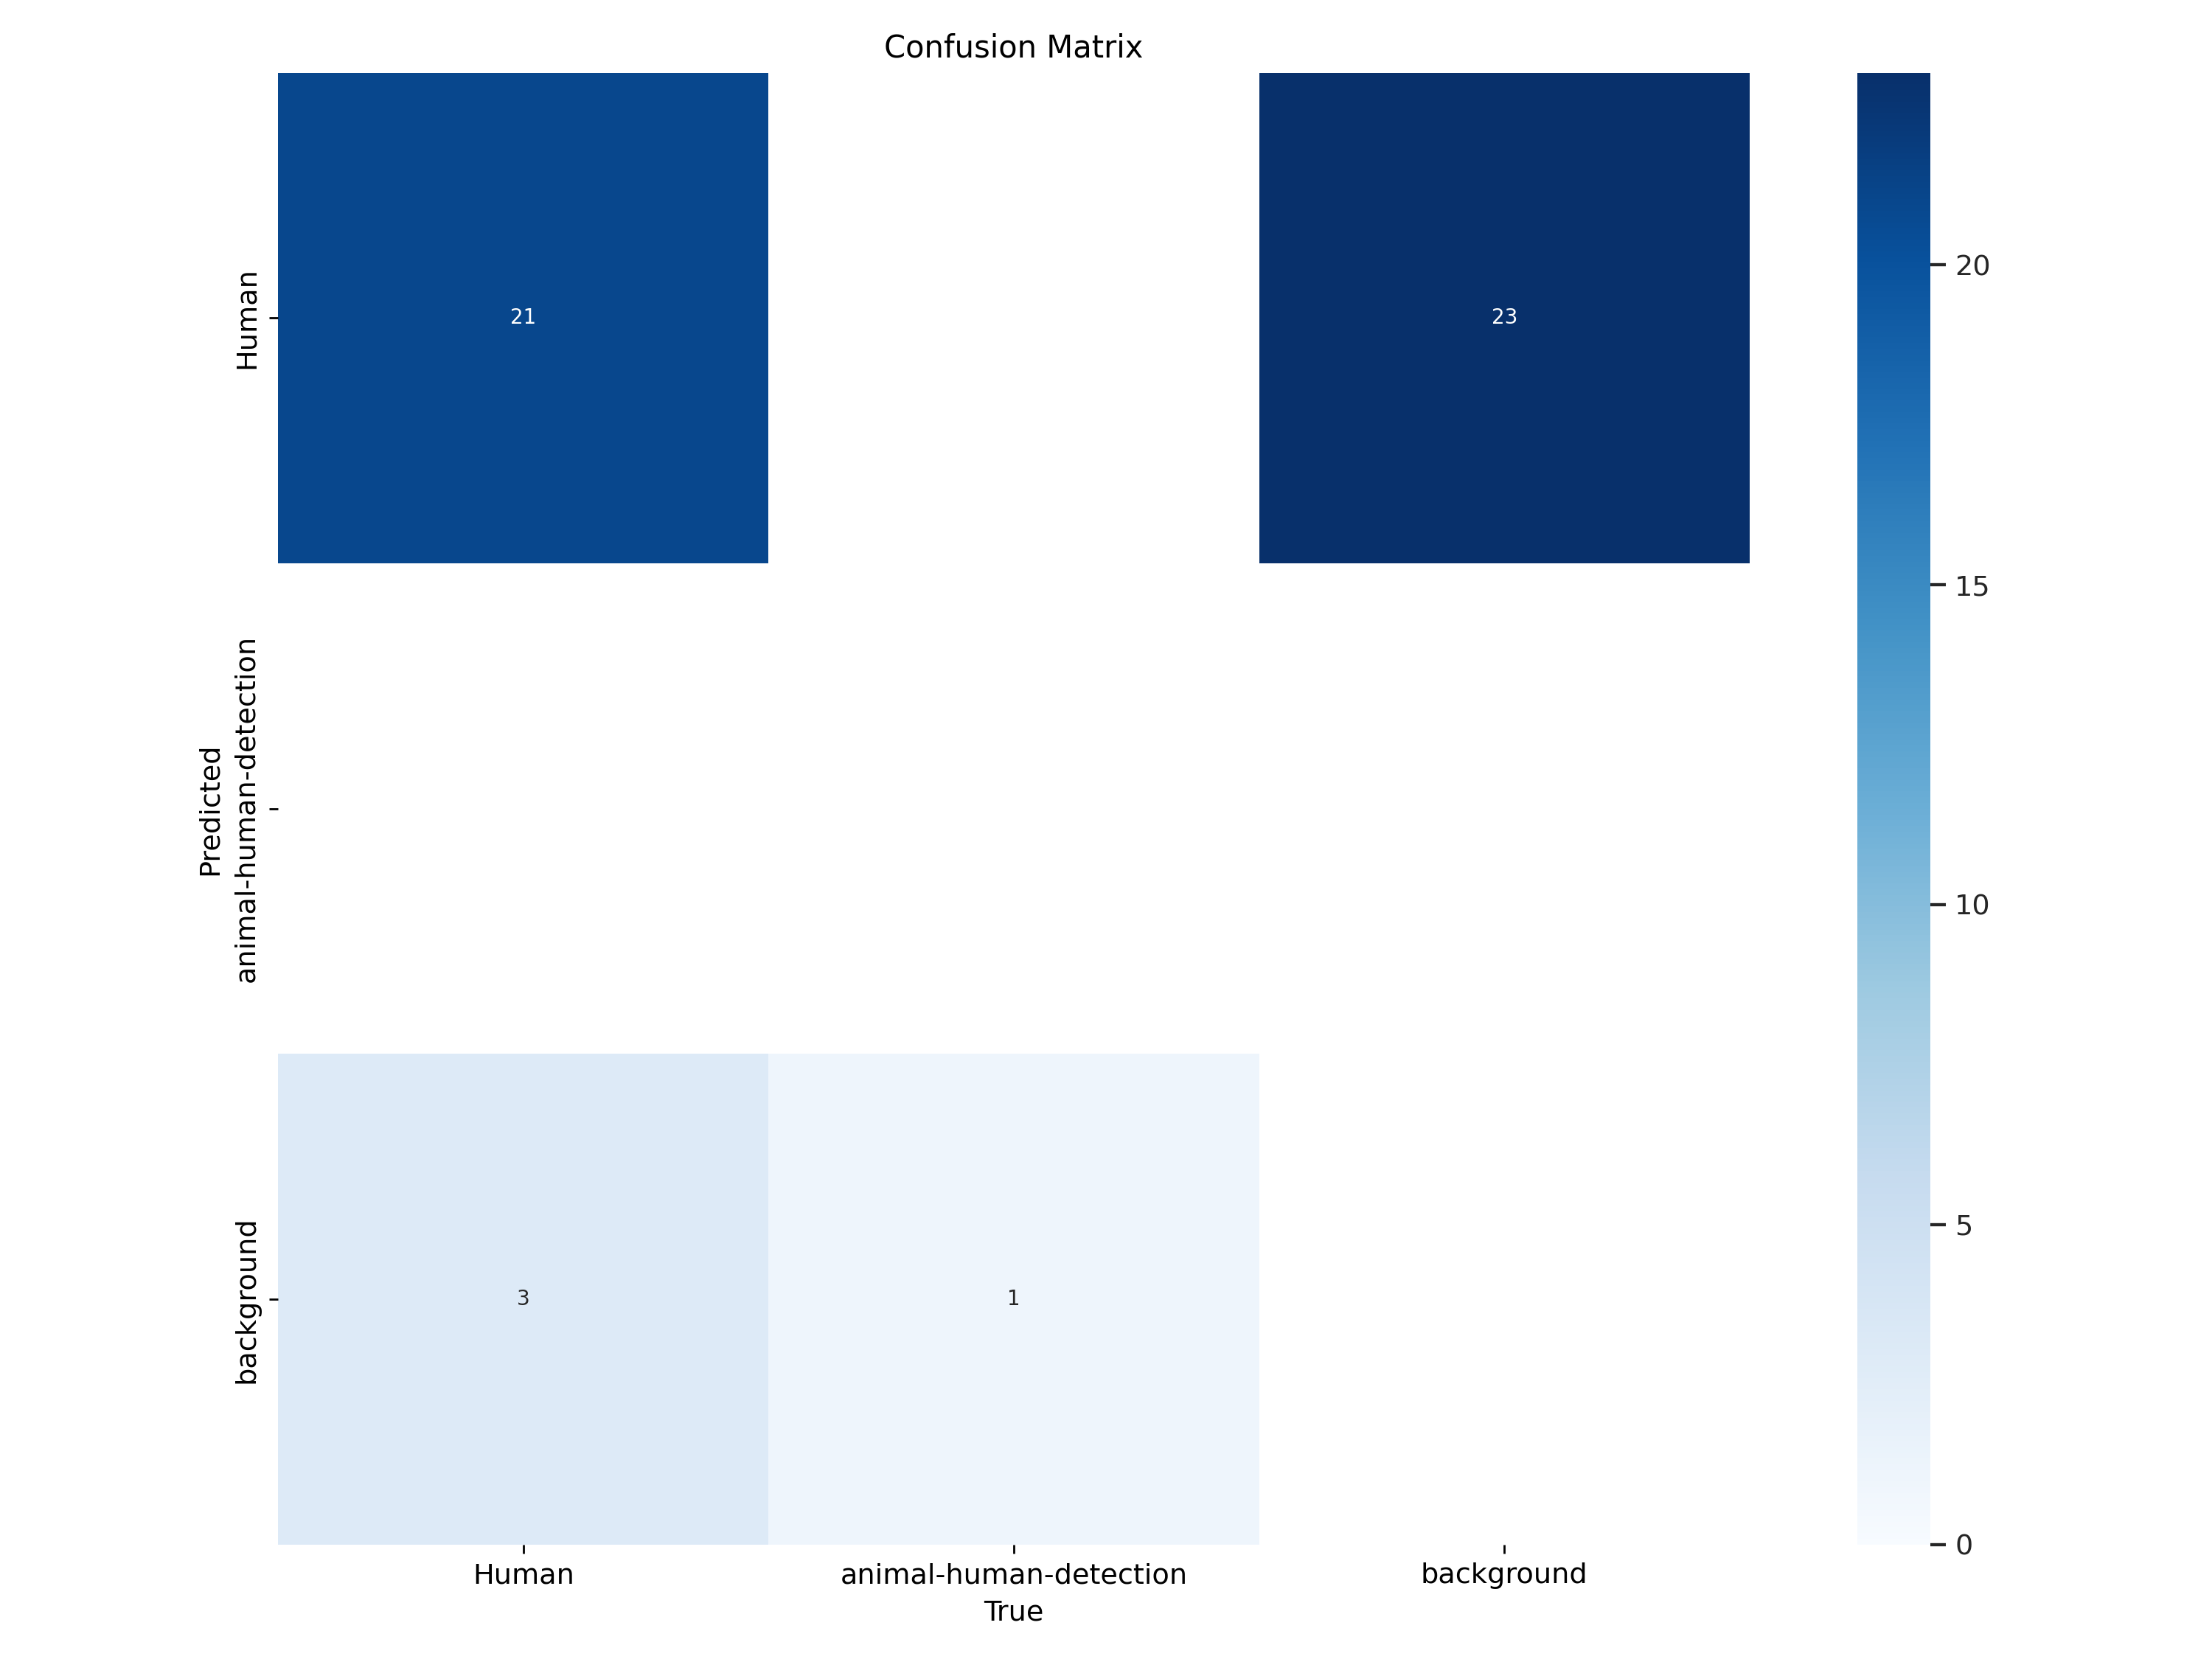

In [ ]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

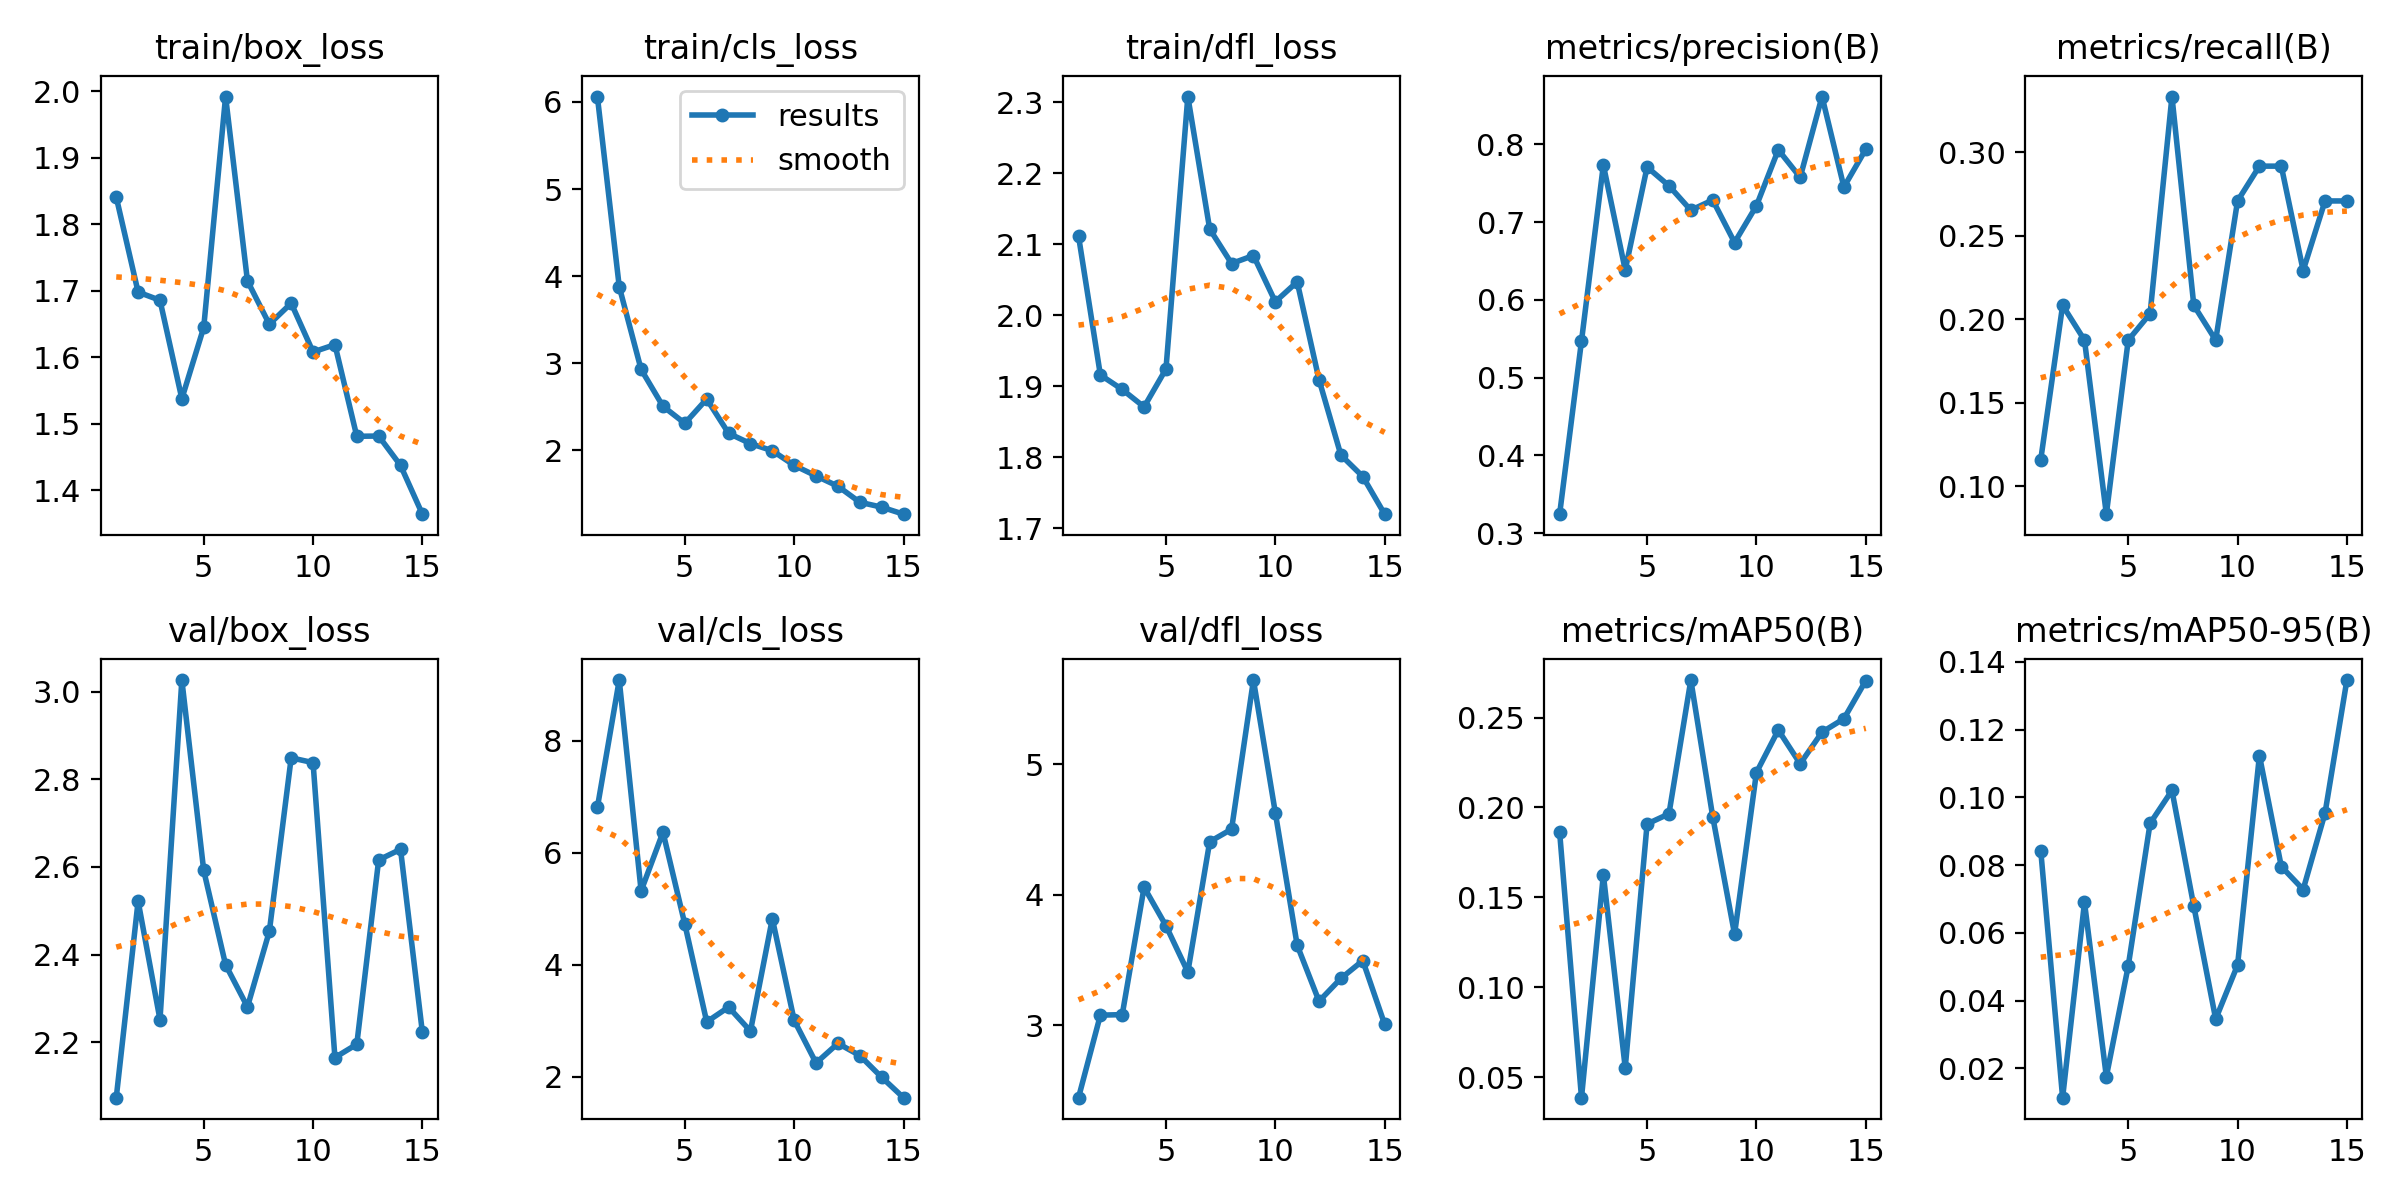

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

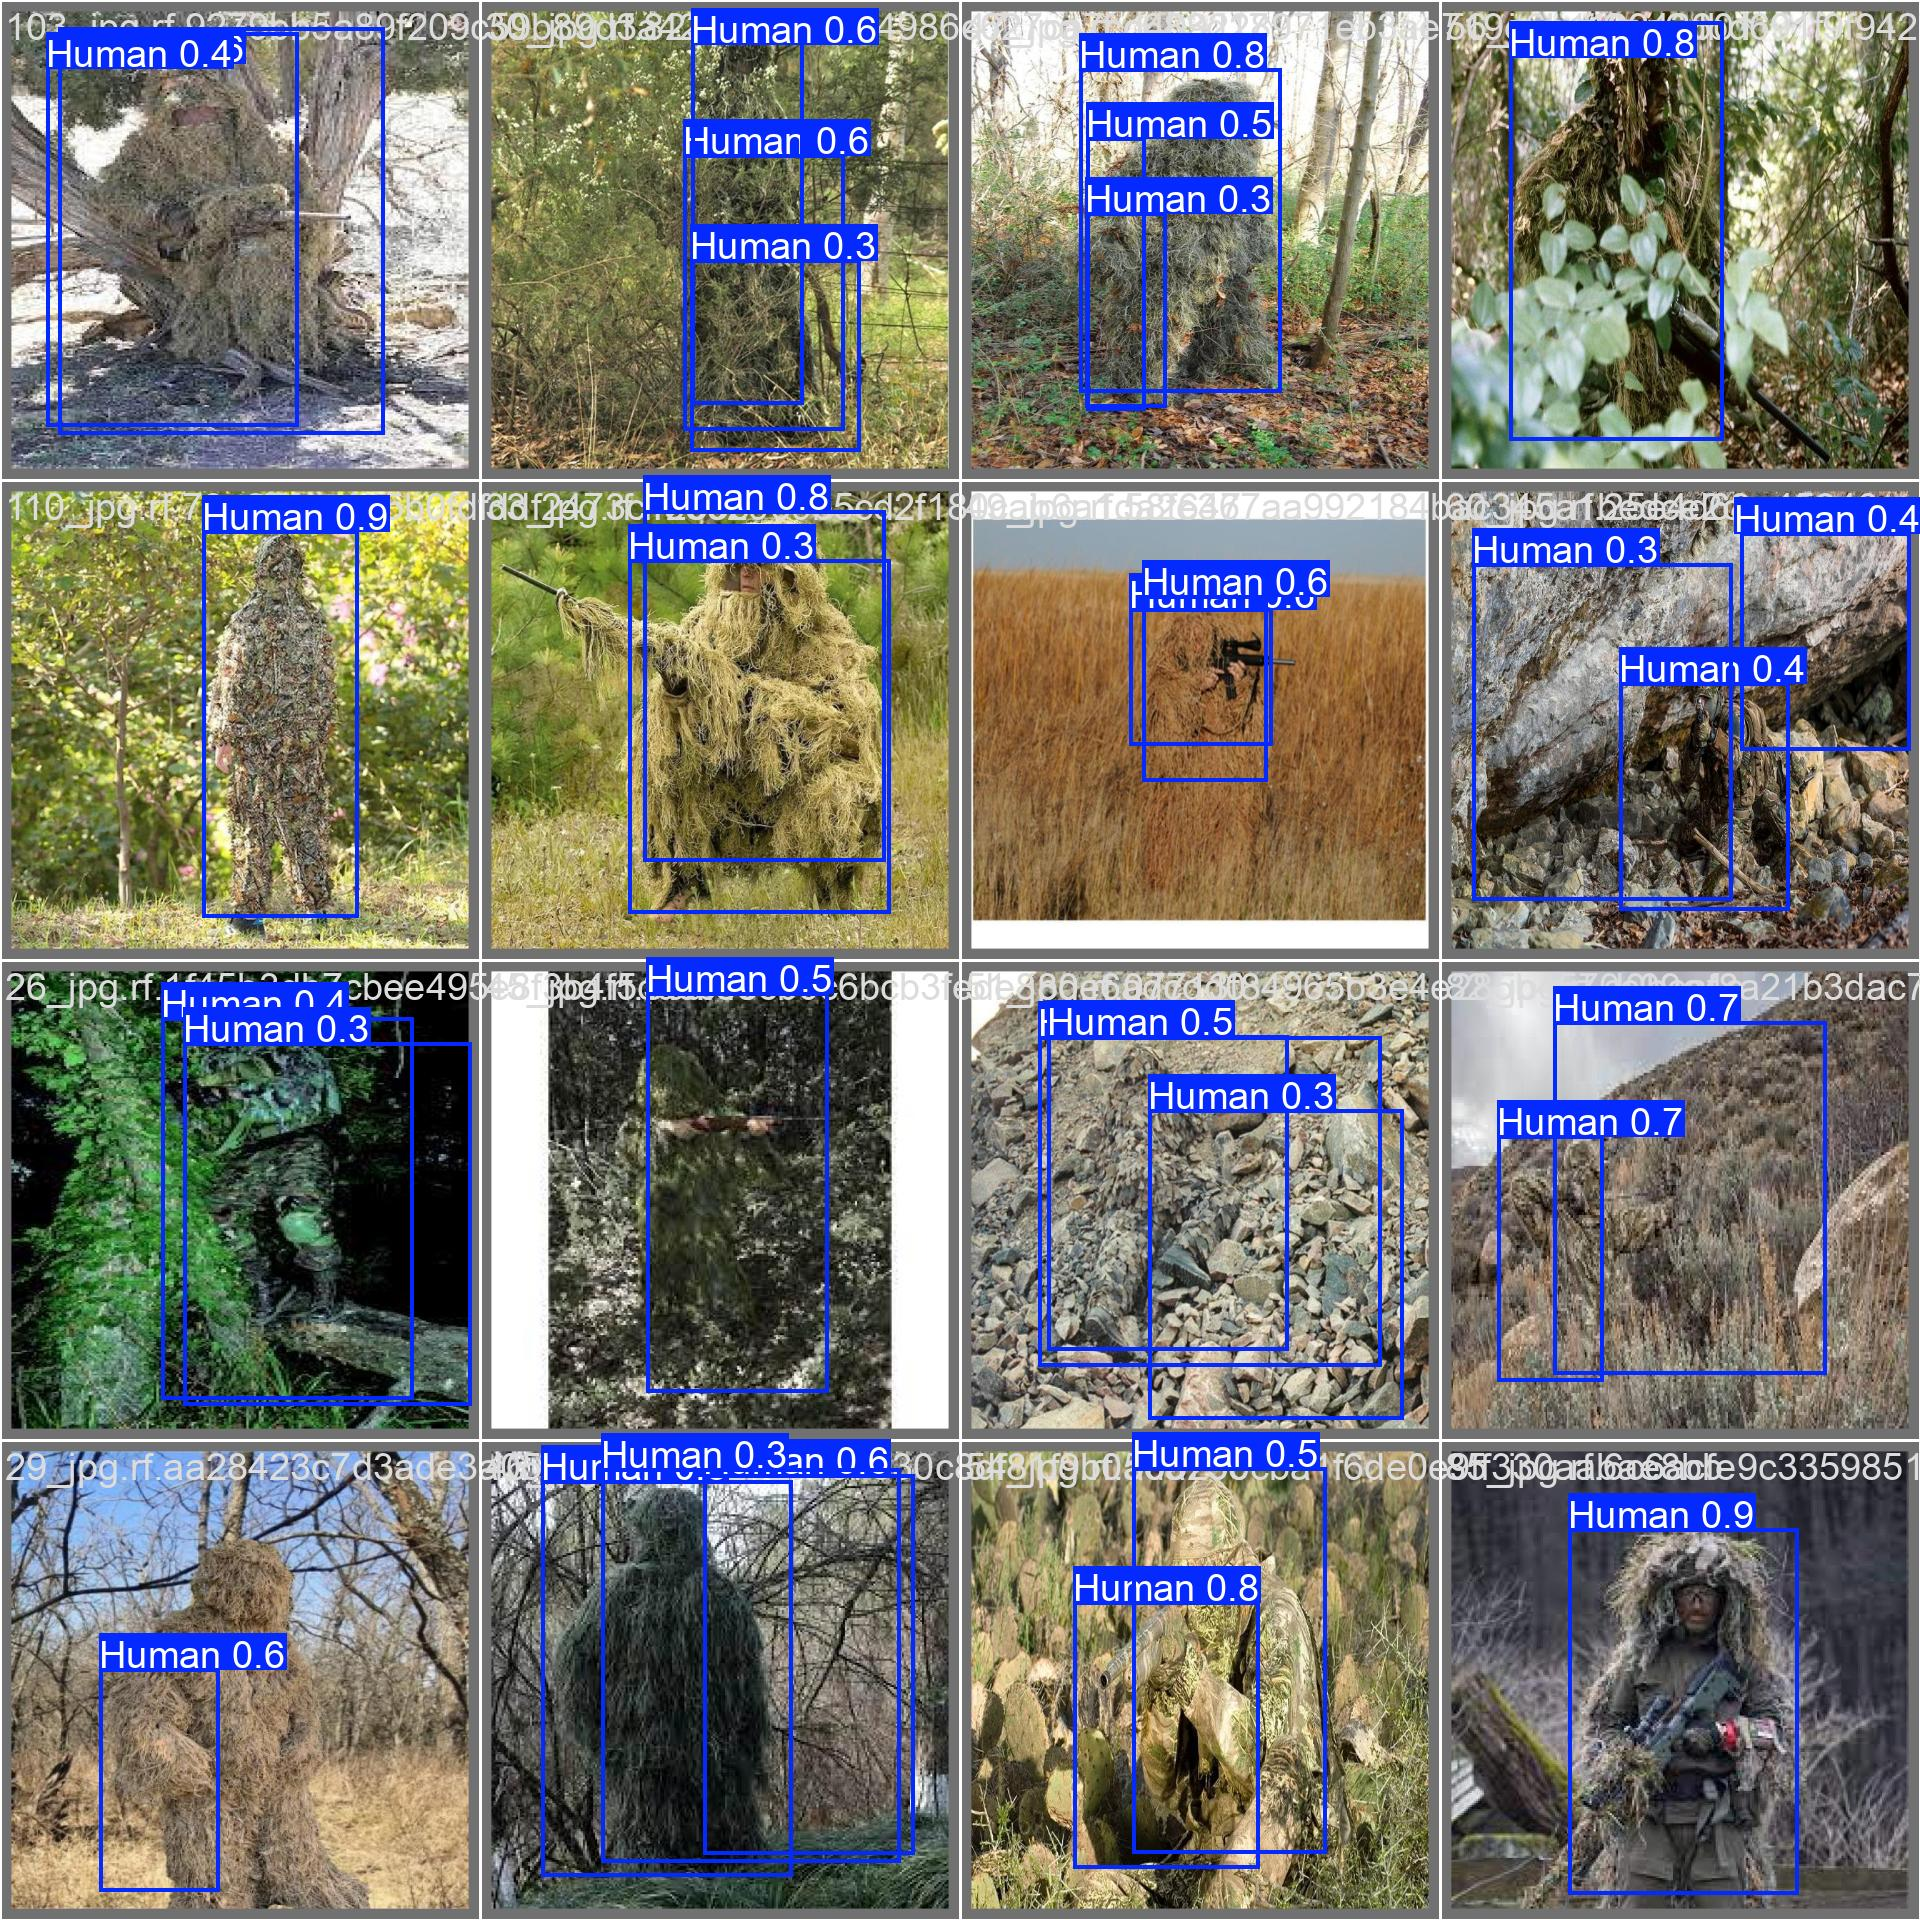

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data="{dataset_path}/data.yaml"

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/drive/MyDrive/DL final model/camouflage-5/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 25. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:04<00:00,  2.21s/it]
                   all         23         25      0.795      0.354       0.35       0.16
                 Human         22         24       0.59      0.708        0.7      0.319
animal-human-detection          1          1          1          0          0          0
Speed: 22.9ms preproce

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="{dataset_path}/test/images" save=True

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/12 /content/drive/MyDrive/DL final model/camouflage-5/test/images/108_jpg.rf.f906e2e829c820df9f847695cb3012be.jpg: 640x640 3 Humans, 17.8ms
image 2/12 /content/drive/MyDrive/DL final model/camouflage-5/test/images/17_jpg.rf.c1f6db21c30e03f99111fc4dd59b3635.jpg: 640x640 3 Humans, 15.7ms
image 3/12 /content/drive/MyDrive/DL final model/camouflage-5/test/images/27_jpg.rf.4f6c607e951a67a63e20666266914722.jpg: 640x640 5 Humans, 15.6ms
image 4/12 /content/drive/MyDrive/DL final model/camouflage-5/test/images/38_jpg.rf.7a31ab5c5b9c4b178047bd7ea82f278f.jpg: 640x640 1 Human, 15.6ms
image 5/12 /content/drive/MyDrive/DL final model/camouflage-5/test/images/39_jpg.rf.fb9dfae436f3bc73eae9cb1c7cc68682.jpg: 640x640 2 Humans, 15.6ms
image 6/12 /content/drive/MyDrive/DL final model/camouflage-5/test/images/3_jpg.rf.28810e7e06812b3

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

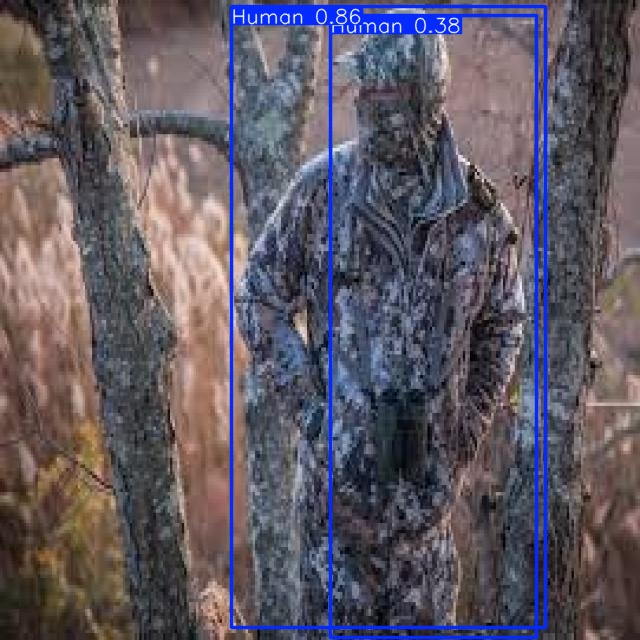

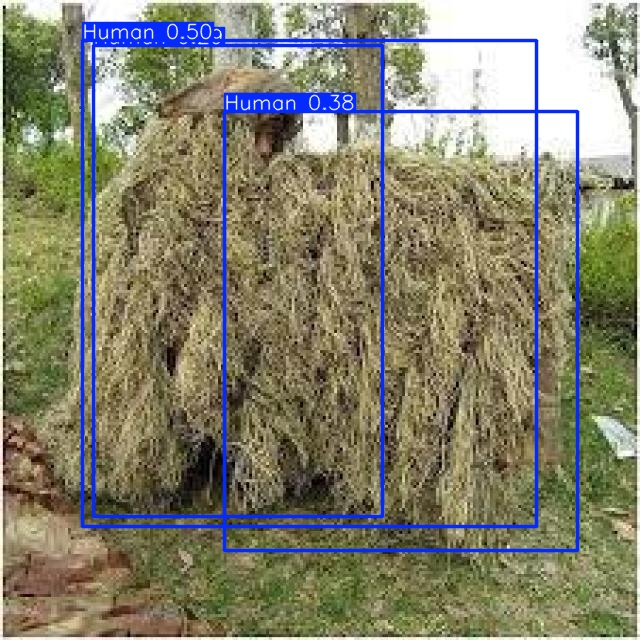

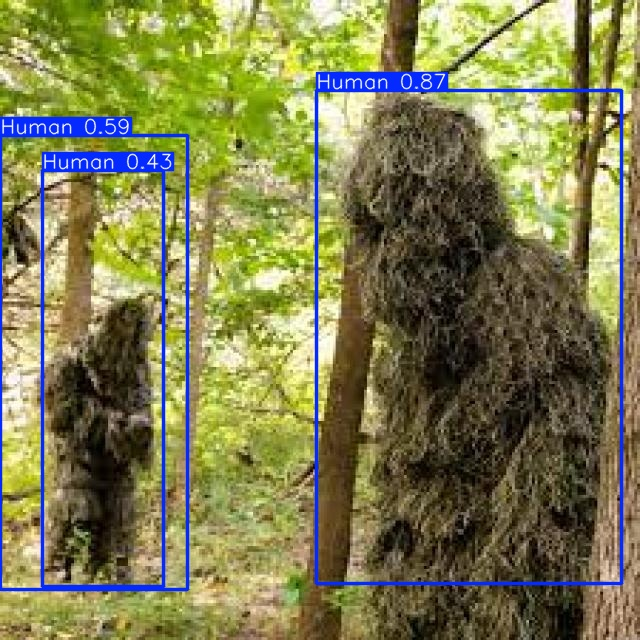

In [ ]:
latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

**Custom Image Testing**

Please enter the path to your custom image: /content/drive/MyDrive/DL final model/custom image check.jpeg
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/drive/MyDrive/DL final model/custom image check.jpeg: 640x640 3 Humans, 15.9ms
Speed: 5.5ms preprocess, 15.9ms inference, 495.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


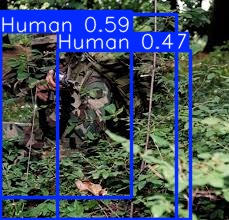

In [ ]:
from IPython.display import Image as IPyImage, display
import os
import glob

# Prompt the user to input the path to the custom image
custom_image_path = input("Please enter the path to your custom image: ")

# Run inference on the custom image using the best model
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt source="{custom_image_path}" conf=0.25 save=True

# Get the latest result directory
latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)

# List all the images in the latest folder to find the output image
output_images = glob.glob(f'{latest_folder}/*.jpg')

if output_images:
    # Display the first output image
    display(IPyImage(filename=output_images[0], width=600))
else:
    print("No output images found. Please check the inference process.")
